In [1]:
import requests #requests library for HTTP requests

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '92549df1ba9e9e2d4d3c7c916a312b5f665a92a4'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
response = get_stock_data('MSFT', '2022-1-1', '2022-5-2')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/MSFT/prices?startDate=2022-1-1&endDate=2022-5-2&token=92549df1ba9e9e2d4d3c7c916a312b5f665a92a4
[{'date': '2022-01-03T00:00:00.000Z', 'close': 334.75, 'high': 338.0, 'low': 329.78, 'open': 335.35, 'volume': 28918013, 'adjClose': 332.5375616786, 'adjHigh': 335.7660816949, 'adjLow': 327.6004095306, 'adjOpen': 333.1335961431, 'adjVolume': 28918013, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-04T00:00:00.000Z', 'close': 329.01, 'high': 335.2, 'low': 326.12, 'open': 334.83, 'volume': 32674306, 'adjClose': 326.8354986344, 'adjHigh': 332.984587527, 'adjLow': 323.9645992968, 'adjOpen': 332.6170329405, 'adjVolume': 32674306, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-05T00:00:00.000Z', 'close': 316.38, 'high': 326.07, 'low': 315.98, 'open': 325.86, 'volume': 40054327, 'adjClose': 314.2889731557, 'adjHigh': 323.9149297581, 'adjLow': 313.891616846, 'adjOpen': 323.7063176955, 'adjVolume': 40054327, 'divCash': 0.0, 'splitFactor': 1.0}, {'dat

In [4]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [27]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)
print('')

x_ticks = []
for elem in dates:
    print(elem[0:10])
    x_ticks.append(elem[5:10])

print(x_ticks)
    

['2022-01-03T00:00:00.000Z', '2022-01-04T00:00:00.000Z', '2022-01-05T00:00:00.000Z', '2022-01-06T00:00:00.000Z', '2022-01-07T00:00:00.000Z', '2022-01-10T00:00:00.000Z', '2022-01-11T00:00:00.000Z', '2022-01-12T00:00:00.000Z', '2022-01-13T00:00:00.000Z', '2022-01-14T00:00:00.000Z', '2022-01-18T00:00:00.000Z', '2022-01-19T00:00:00.000Z', '2022-01-20T00:00:00.000Z', '2022-01-21T00:00:00.000Z', '2022-01-24T00:00:00.000Z', '2022-01-25T00:00:00.000Z', '2022-01-26T00:00:00.000Z', '2022-01-27T00:00:00.000Z', '2022-01-28T00:00:00.000Z', '2022-01-31T00:00:00.000Z', '2022-02-01T00:00:00.000Z', '2022-02-02T00:00:00.000Z', '2022-02-03T00:00:00.000Z', '2022-02-04T00:00:00.000Z', '2022-02-07T00:00:00.000Z', '2022-02-08T00:00:00.000Z', '2022-02-09T00:00:00.000Z', '2022-02-10T00:00:00.000Z', '2022-02-11T00:00:00.000Z', '2022-02-14T00:00:00.000Z', '2022-02-15T00:00:00.000Z', '2022-02-16T00:00:00.000Z', '2022-02-17T00:00:00.000Z', '2022-02-18T00:00:00.000Z', '2022-02-22T00:00:00.000Z', '2022-02-23T00:00:0

In [28]:
def calculate_price_difference(opens, closes):
    price_differences = []
    #No need for open price of first data point or close price of last data point since no close or open from prev or next days respectively to compare
    for i in range(len(opens) - 1): 
        if opens[i + 1] >= closes[i]: #skip first open point and last close point
            price_differences.append([1, 0]) #One Hot Encoder, [1 0] increase, [0 1] decrease for classification 
        else:
            price_differences.append([0, 1])
    return price_differences

In [29]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences: #for each array in price differences array, append the first value to show increase or decrease
    differences.append(difference[0]) 

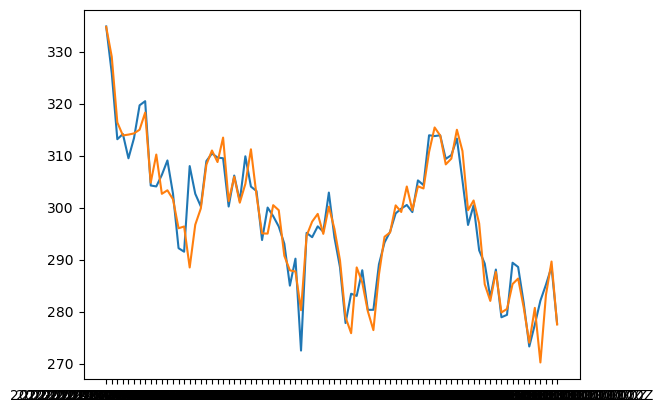

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(dates[1:], opens[1:]) 
plt.plot(dates[1:], closes[:-1])
plt.show() #Show opens and closes as separate lines to aid visualisation

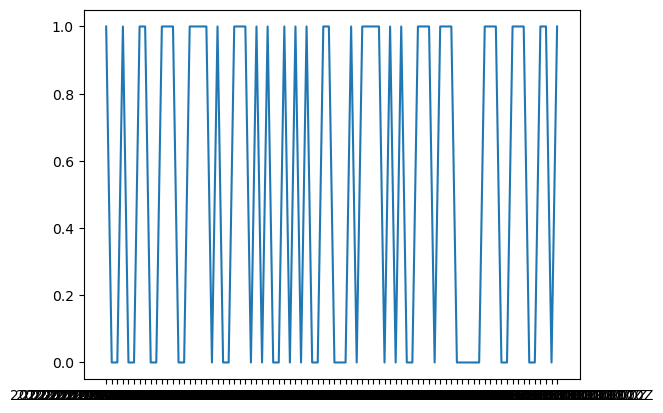

In [9]:
plt.plot(dates[1:], differences) #Show differences between nominal 0 and 1
plt.show()

In [10]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000]) 
        #vols/1000 for vols to not skew the data as much since vols in millions whereas other values in hundreds or thousands
    
    return inputs, labels

In [11]:
x_train, y_train = create_datasets('MSFT', '2021-1-1', '2022-4-1') #Training dataset, A year worth of data shows better results, trial and error to find out
x_test, y_test = create_datasets('MSFT', '2021-4-1', '2021-5-2') #Testing dataset
#Again too much data is not always good, refer back to top of notebook

In [15]:
# y = Wx + b
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5]) #None: any number, 5: each input has 5 elements in it
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])#None: any number, 5: each input has 2 elements in it
#using ones to create arrays of ones instead of zeroes since sometimes zeroes can cause dead neurons 
W = tf.Variable(initial_value=tf.ones(shape=[5, 2])) #Shape for W should be the combination of x_input and y_input, as it's the ratio between them
b = tf.Variable(initial_value=tf.ones(shape=[2])) # output is array of two members (from OHE i.e. [1,0] or [0,1]) shape has to reflect that
y_output = tf.add(tf.matmul(x_input, W), b) #Matrix multiplication due to W matrix multiplied with x_input

In [17]:
#loss function, add together all components of loss func, reduce_mean find minimum avg. of answers
# softmax_cross_entropy_with_logits_v2 is another loss func, logits is similar to OHE
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_input, logits=y_output))) #labels: y-train, y_test; logits: model outputs
optimizer = tf.train.GradientDescentOptimizer(0.01)
#Different optimizers don't give too much variance in results but can still improve model slightly, trial and error 
train_step = optimizer.minimize(loss)

In [18]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        #[1,0] or [0.55,0.45] etc. since not exactly [1,0] during calculation, actual and expected
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:  
            num_correct += 1
        #[0,1] or [0.3,0.7] etc. since not exactly [0,1] during calculation, actual and expected
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100 #return percentage average of actual accuracy

In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

2022-11-15 16:16:12.320091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 16:16:12.327048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [20]:
for _ in range(20000): #Optimal result between 10000 - 20000 epochs, trial and error
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
print(measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test)) 
#Run input through graph itself, feed dict for x_input

#Improvements: increase no. of epochs, lower learning rate(need to inc. epochs as well)
#This is simple Linear Regression so not much acc. also COVID have caused high volatility within the market in the last 2 years

45.0


In [21]:
print(session.run(
    y_output, feed_dict={x_input: x_test}), y_test) #Showing OHE values of Test set

[[ 3690974.5 -3628371.8]
 [ 4553855.  -4478061. ]
 [ 2699704.8 -2651854.5]
 [ 2670221.  -2622786.8]
 [ 2784579.2 -2735301.5]
 [ 2875821.2 -2825130.2]
 [ 3247659.2 -3191313. ]
 [ 2806018.2 -2756277. ]
 [ 2706084.8 -2657886. ]
 [ 3041997.2 -2988669.2]
 [ 2941513.8 -2889676. ]
 [ 2720596.2 -2672098.2]
 [ 2260527.2 -2219012.5]
 [ 2829623.2 -2779484.5]
 [ 3039259.8 -2985975. ]
 [ 2494235.2 -2449158.2]
 [ 2261550.  -2219929. ]
 [ 3751524.5 -3687399. ]
 [ 5865324.5 -5769474. ]
 [ 5031327.  -4948119. ]] [[1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1]]
